## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2:  Sales Data Analysis

In [6]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 3, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

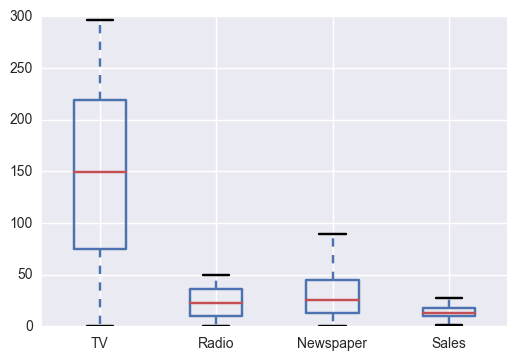

In [306]:
df.boxplot()
plt.show()

Based on this, the variable ranges are much different, and so we have to be careful to standardize
them before making any interpretations of the model. This isn't necessary for training the model however
if all we care about is performance. 

### Problem 3, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [307]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


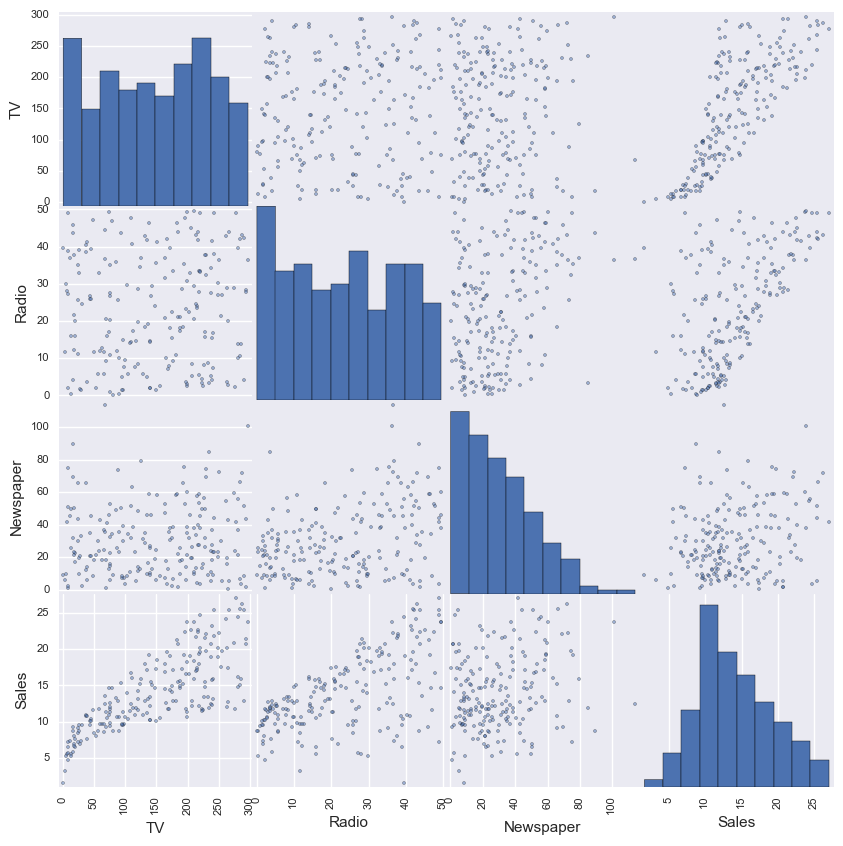

In [308]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,10)) #data, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

This is an explanation 

Based on the above plots, it doens't seem that any features are strongly correlated with one another (predictive variables),
however Radio and TV seem to correlation with Sales.

In [286]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Looking at the correlation matrix, we see strong correlations between Radio and Sales and TV and Sales. The correlation with 
Newspaper is around 0.23, which is not very high.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

1. Set y to be the sales in the dataframe df, y to be sales, and split into training/testing.

In [7]:
# Split the data into training/testing sets

y = df['Sales']
X = df.drop(['Sales'],1) 

# We Choose 80% for training, 20% for testing. This should really be done randomly.

# Method 1:
size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Method 2 (this is better since it randomizes as well):
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R^2 Score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.04472952,  0.18919505,  0.00276111]))
Residual sum of squares: 3.17
R^2 Score: 0.90


Recalling from lecture, the RMSE is defined as 

$
\begin{equation}
\frac{1}{N} \sum_{i=1}^N (y_i - \hat y_i)^2,
\end{equation}
$

where $\hat y_i$ is our prediction, and $y_i$ is the actual value. The RMSE is harder to interpret overall,
and as such, I prefer not to use it.


The $R^2$ value is defined as:

$
\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^N (y_i - \hat y_i)^2}{\sum_i (y_i - \bar y)^2}
\end{equation}
$

This is a more scaling invariant measurement of performance of a model. A score of $0.9$ means that our
mdoel explains 90% of the variance in the model. That's pretty good!

In general, if you have a score of 0.96 or above, you should be skeptical that you may have a causual feature
hidden in your dataset - more on this later. 

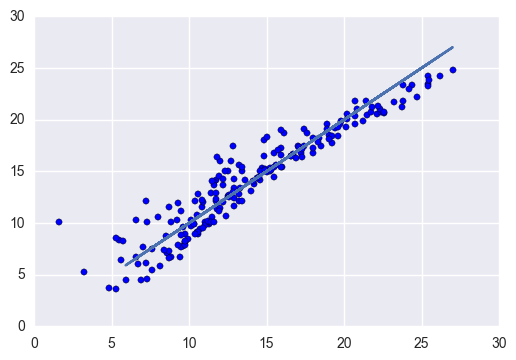

In [285]:
plt.scatter(y,regr.predict(X))
plt.plot(y_test,y_test)

Based on the plot above, the model seems quite good (0.90 R^2 is very good), and visually the model seems linear with some outliers

###  Which coefficients are the most significant?

In order to measure coefficients, recall that we must

- a) Standarize coefficients
- b) Remove collinear features

In [391]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X2 = X.as_matrix().astype(np.float)
X2 = scaler.fit_transform(X)


In [395]:
size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.0472521 ,  0.179922  , -0.00094408]))
Residual sum of squares: 2.79
Variance score: 0.90


In [304]:
regr.coef_
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'coef':regr.coef_})

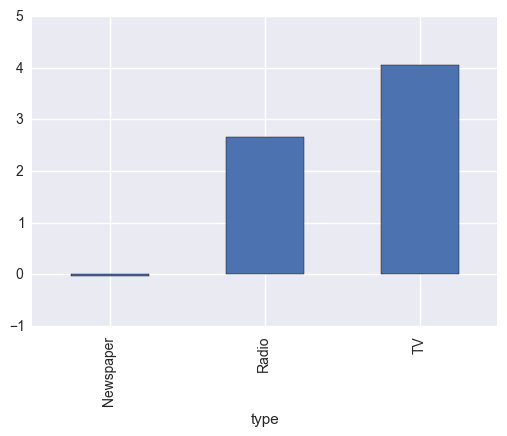

In [290]:
df.groupby('type')['coef'].mean().plot(kind='bar')

We see that TV has the most significant impact out of all of the variables. What would happen if we didn't normalize?

#  How could you have improved performance?

# Plot 3d results using fitted model

Now that we've optimized our model, let's visualize it in 3d space and see how good it looks

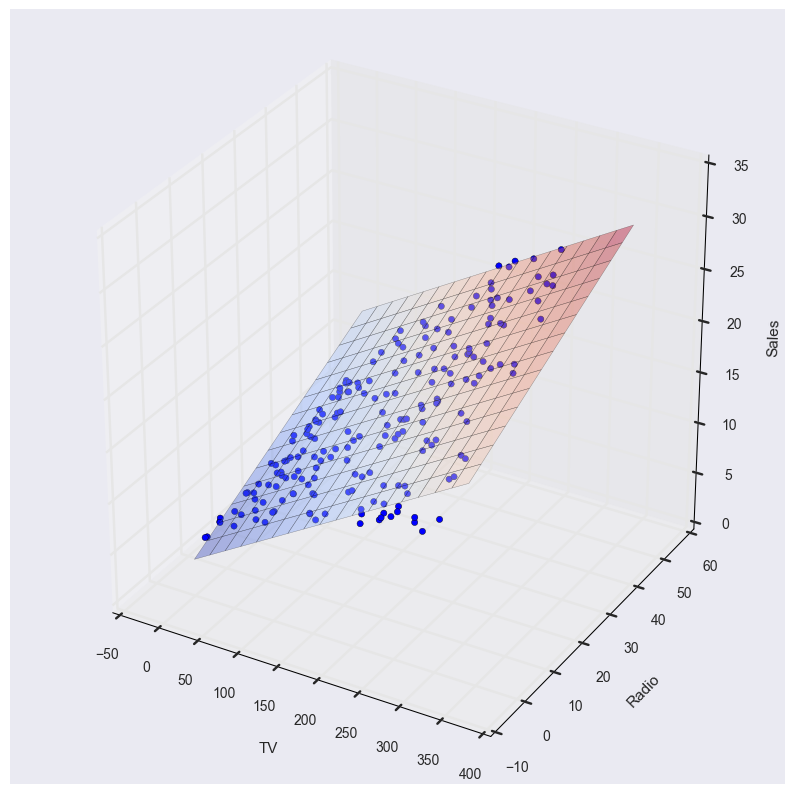

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='Sales ~ TV + Radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

It appears here that there is some nonlinear interaction, the hyperplane seems to distance itself
for large values of TV and Radio

## Introduction mixture terms

Based on the non-linear interaction, it appears that once we are over-estimating our sales when we have invested
enough in TV or Radio. How can we fix this? Introduce a non-linear term.

In [9]:
X['TV*Radio']=X['TV']*X['Radio']
X = X.drop(['Newspaper'],1)

In [325]:
size = float(len(X))

X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.01918396,  0.02648516,  0.00109794]))
Residual sum of squares: 0.39
Variance score: 0.99


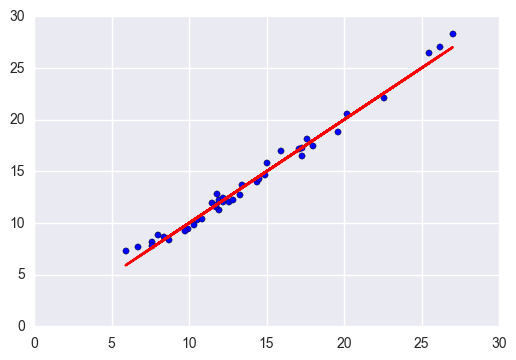

In [326]:
plt.scatter(y_test,regr.predict(X_test))
plt.plot(y_test,y_test,color='r')

Notice how the performance has dramatically improved! We plotted the results to obtain some intuition
about the data and observed some non-linear interactions present. 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          6.68e-146
Time:                        09:14:08   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

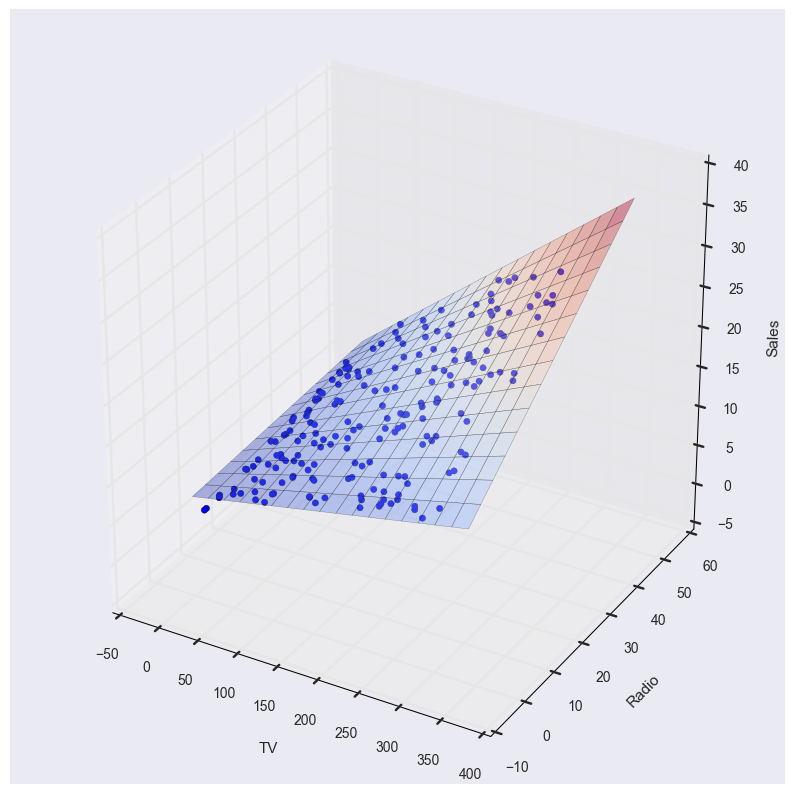

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Create a linear OLS model with TV:Radio interaction term 
# such that Sales = beta_0 + beta_1 * TV + beta_2 * Radio + beta_3 * Radio * TV
model = sm.ols(formula='Sales ~ TV * Radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20) 
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)

# Create surface plot
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

# Create scatter plot
ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Print OLS regression results
print fit.summary()

plt.show()

### Using a nonlinear-non parametric model

We will see that using a non-linear model also improves performance - it allows us to more naievely
apply an algorithm without really knowing the details of the non-linear interaction

In [319]:
y = df['Sales']
X=df.drop(['Sales'],1) 

from sklearn.tree import DecisionTreeRegressor

# We Choose 80% for training, 20% for testing. This should really be done randomly.
size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = DecisionTreeRegressor(max_depth=5)

# Train the model using the training sets
regr.fit(X_train, y_train)


# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 0.94
Variance score: 0.96


This code allows us to visualize the decision tree:

In [310]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

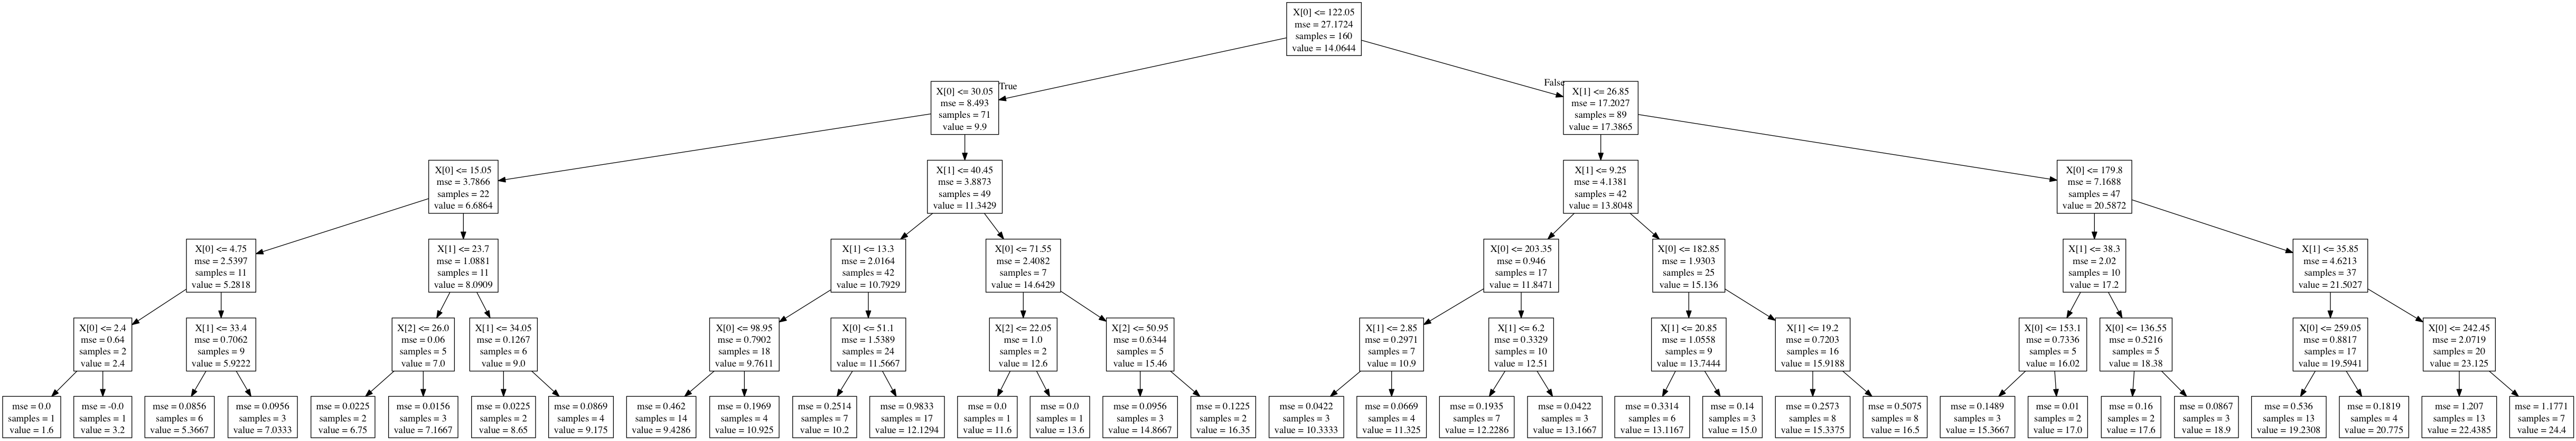

In [316]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image  
dot_data=export_graphviz(regr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


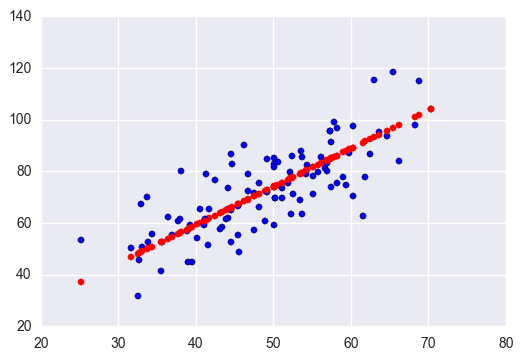

In [333]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]
errors=[]

def run(num_iterations,learning_rate = 0.0001):
    points = genfromtxt("/Users/dgoldma1/Documents/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Let's try plotting the errors after a few iterionats of gradient descent for various
learning rates, and see how it affects convergence to the solution.

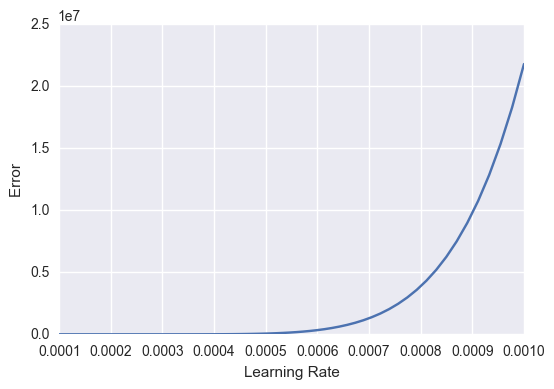

In [374]:
points = genfromtxt("/Users/dgoldma1/Documents/APMAE4990-/data/data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
learning_rates = np.logspace(-4,-3,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error ')

plt.plot(learning_rates,errors,label='num_iterations='+str(num_iterations))


### Taken from Alex Lauro's solutions:

**Answer**

In the four cases above, we show the effects of modifying the learning rate parameter on the convergence or divergence of the gradient descent method. The following table summarizes the results:

$$
\begin{aligned}
&& \text{Learning Rate} && \text{Error after 10 iterations} && \text{Error after 100 iterations} && \text{Absolute Error} \\
\text{Case 1: Somewhat Fast Convergence} && 0.00005 && 143.991205886 && 112.648860998 && 31.342344888 \\
\text{Case 2: Fast Convergence} && 0.0001 && 112.672384359 && 112.647056643 && 0.025327716 \\
\text{Case 3: Slow Convergence} && 0.0004 && 4964.62851652 && 1603.9025065 && 3360.72601002 \\
\text{Case 4: Divergence} && 0.0005 && 7312008.36394 && 3.06126079792 \cdot 10^{38} && 3.06126079792 \cdot 10^{38} \\
\end{aligned}
$$

We see in Case 2 that the learning rate set to $0.0001$ results in the fastest convergence as the absolute error between 10 and 100 iterations is on the order of $10^{-2}$. Case 1, with the smaller learning rate of $0.00005$, results in a less fast convergence since the absolute error is $31.342344888$. Case 3, where the learning rate is $0.0004$, results in a slow convergence as the absolute error is $3360.72601002$. Lastly, Case 4, where the learning rate is $0.0005$, shows divergence from the solution as the error increases with each additional iteration. Thus, we infer that the optimal learning rate is closer to $0.0001$.

Firstly, we note that the learning rate determines the time step size that the gradient descent method uses to minimize (at least locally) a given convex function. The role of the learning rate $\kappa$ can be seen in the following equation:

$\beta_{n} = \beta_{n-1} - \kappa \nabla_{\beta} \mathcal{L}(\beta_{n-1})$.

Here, we note that the learning rate $\kappa$ serves as a weighting mechanism to fine tune how much emphasis we want to place on the gradient of the cost function. If $\kappa$ is small, then the difference between $\beta_{n-1}$ and $\beta_{n}$ will also be small, leading to a larger number of steps (i.e., larger $n$) in order to find an acceptable minimum $\beta^*$. Thus, choosing $\kappa$ to be too small can result in a very slow solution. On the other hand, we must be careful to choose $\kappa$ such that it is not too large, otherwise we may take step sizes so large that we bypass the minimum altogether, leading to a divergent solution.

# Visualization 1: A good learning rate

Here we take a learning rate of 0.00001, which seems to produce a small error rate based on the curve above.
We will see that after a certain number of iterations, we get a relatively good fit.

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


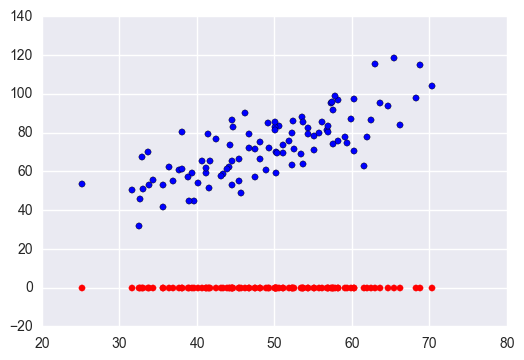

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


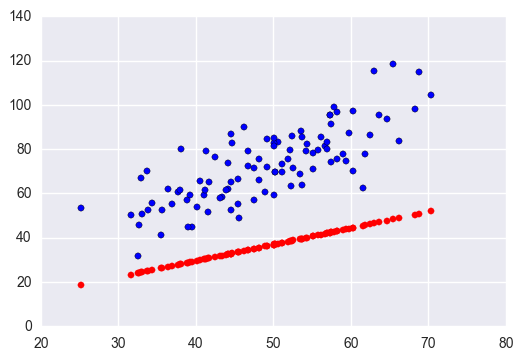

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


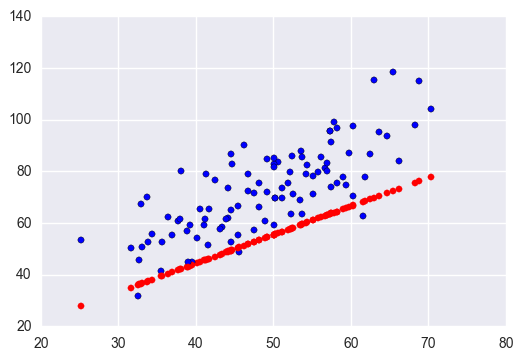

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


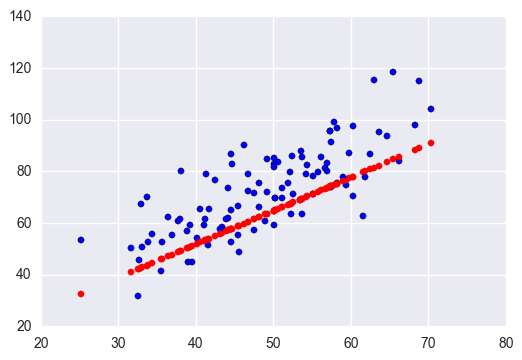

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


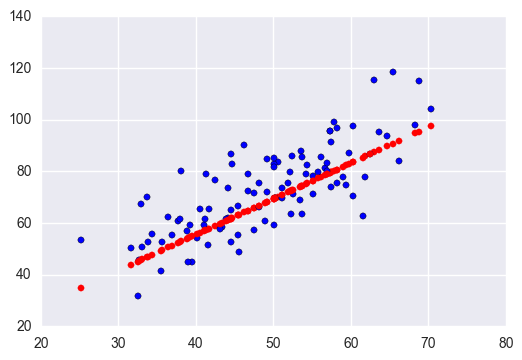

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


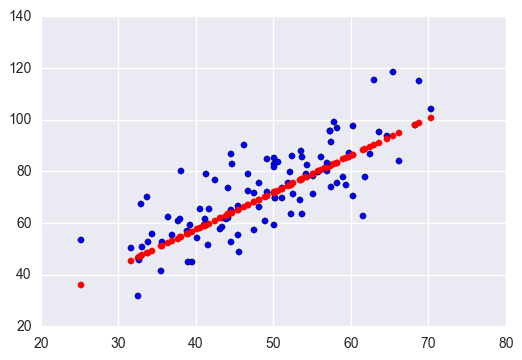

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


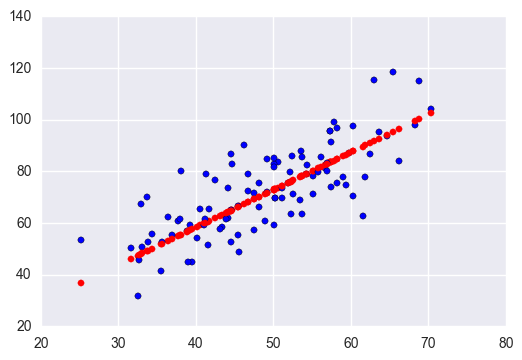

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


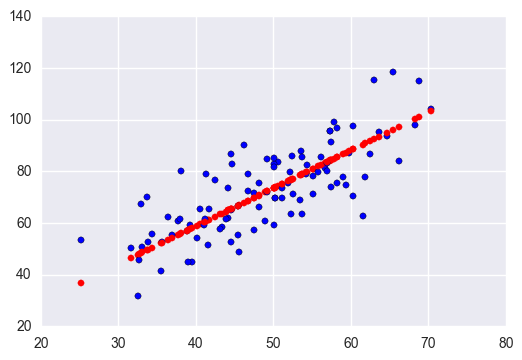

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


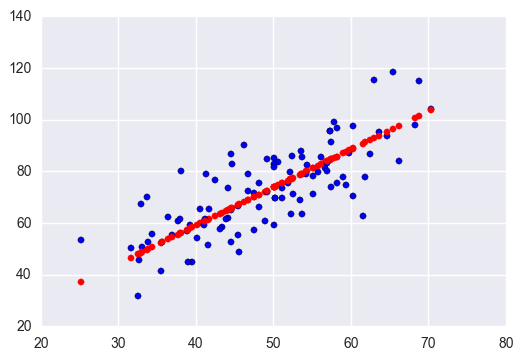

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


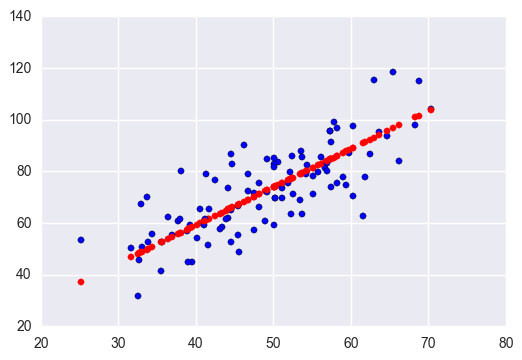

In [372]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()


# Visualization 2: A bad learning rate

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


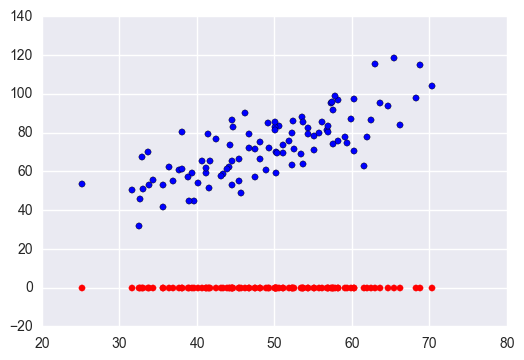

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 1454.70101107, m = 73707.0297359, error = 1.35426676258e+13


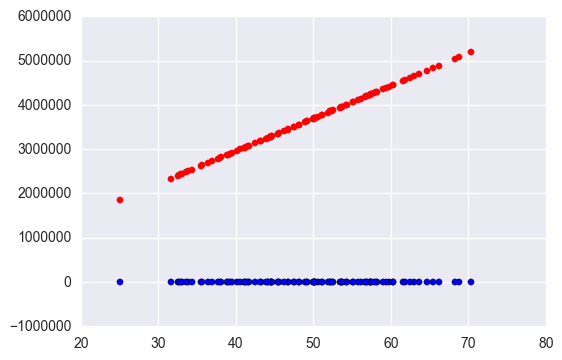

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = -72197663.2168, m = -3673303989.61, error = 3.36369164904e+22


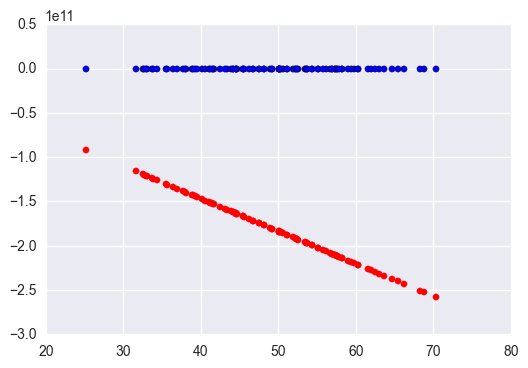

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 3.59814917736e+12, m = 1.83068173803e+14, error = 8.35464756468e+31


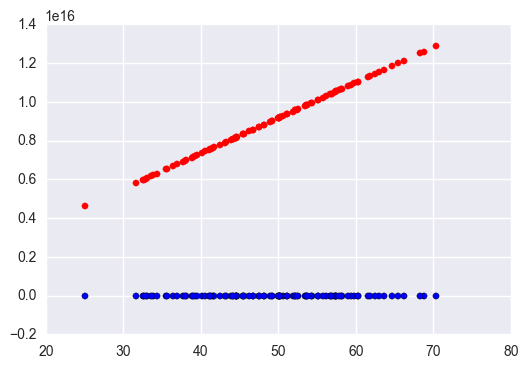

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = -1.7932264811e+17, m = -9.12365443812e+18, error = 2.07510506945e+41


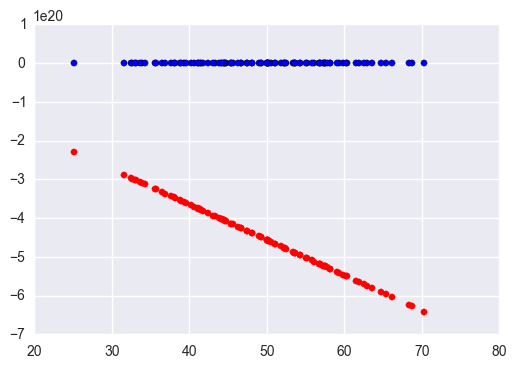

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 8.93698691749e+21, m = 4.54699845293e+23, error = 5.15409060159e+50


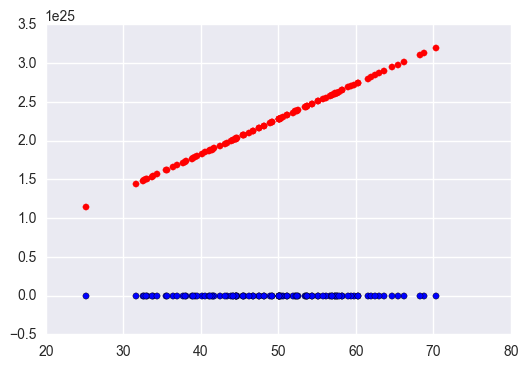

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = -4.45396808519e+26, m = -2.26610894474e+28, error = 1.28015927099e+60


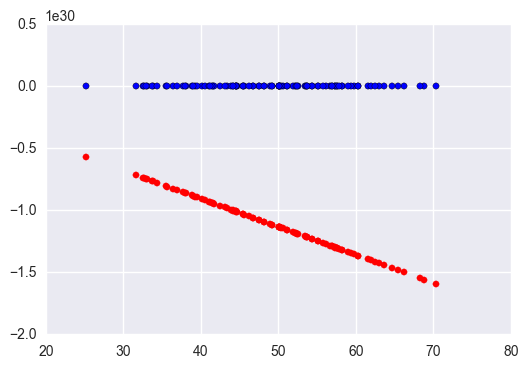

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 2.21974496405e+31, m = 1.12937134301e+33, error = 3.17962543886e+69


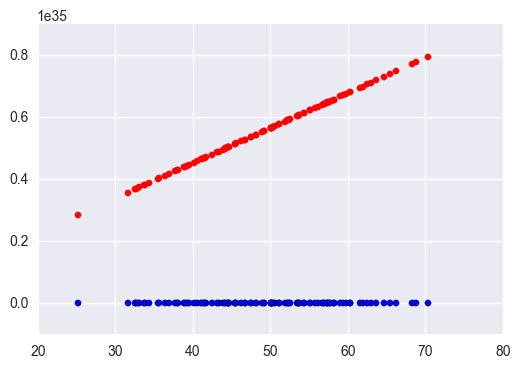

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = -1.1062647085e+36, m = -5.62850093048e+37, error = 7.89746882326e+78


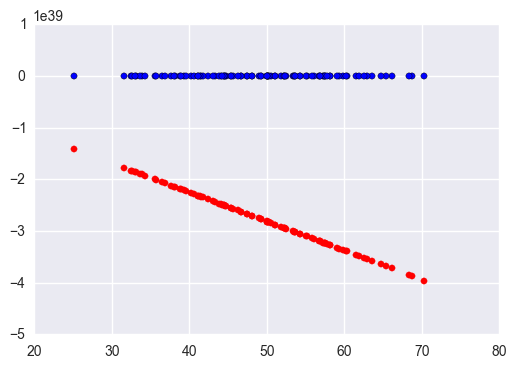

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 5.51334331237e+40, m = 2.8051024068e+42, error = 1.96155223355e+88


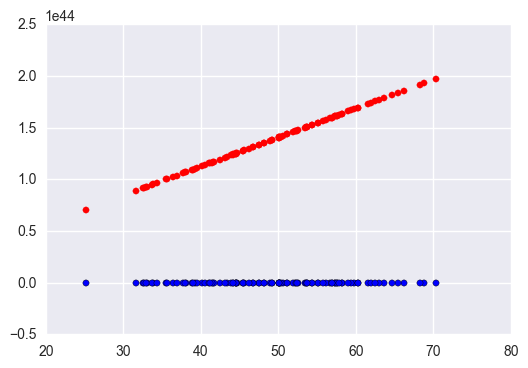

In [380]:
learning_rate = 10
for num in range(0,10):
    run(num,learning_rate)
    plt.show()


# Visualization 3: An inefficient learning rate

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


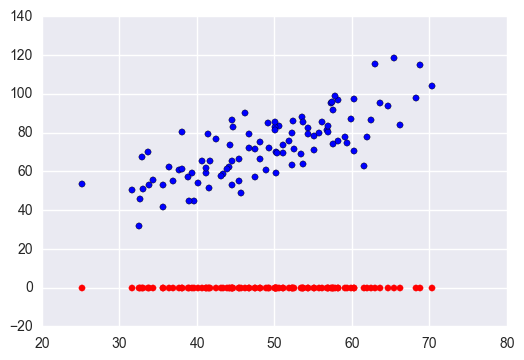

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.00145470101107, m = 0.0737070297359, error = 5035.16680684


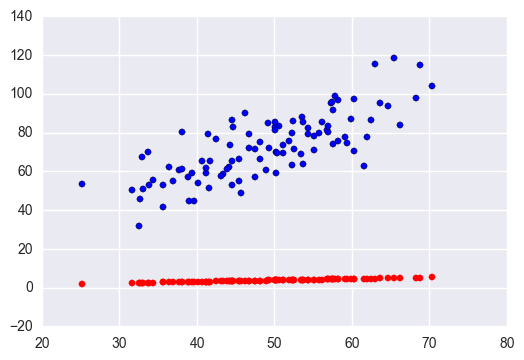

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.00283720144953, m = 0.143740608068, error = 4556.73237159


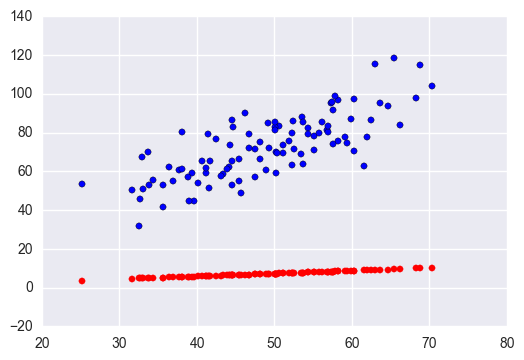

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.00415109968114, m = 0.210283814191, error = 4124.79844518


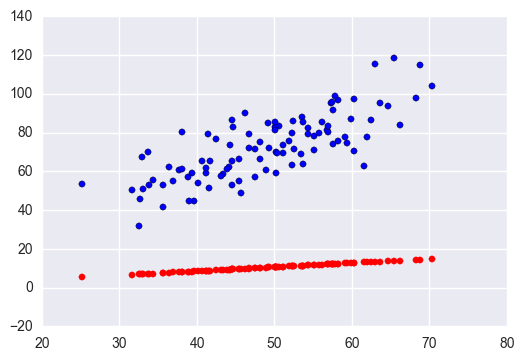

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.00539981473464, m = 0.273510602911, error = 3734.8455006


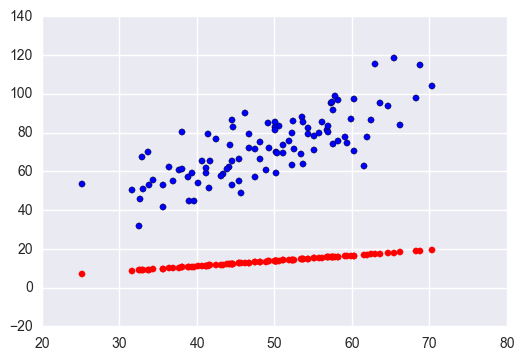

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.00658659523961, m = 0.333586259394, error = 3382.79327757


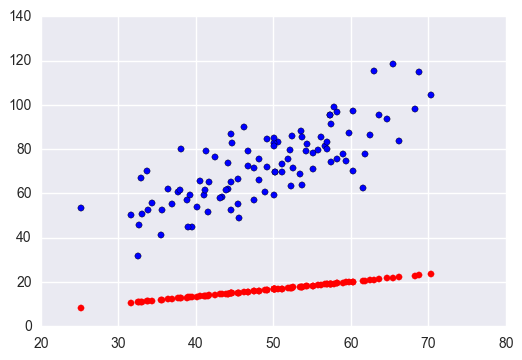

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.00771452791889, m = 0.390667831247, error = 3064.9580888


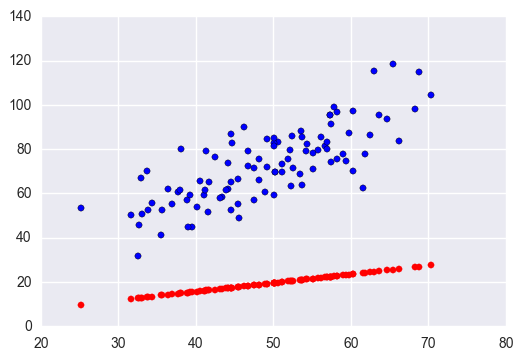

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.0087865456578, m = 0.444904539064, error = 2778.01427584


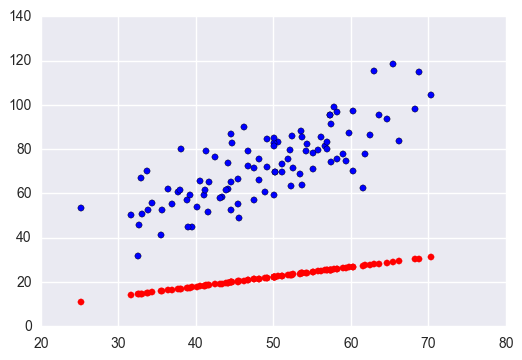

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.00980543517113, m = 0.496438166513, error = 2518.9594112


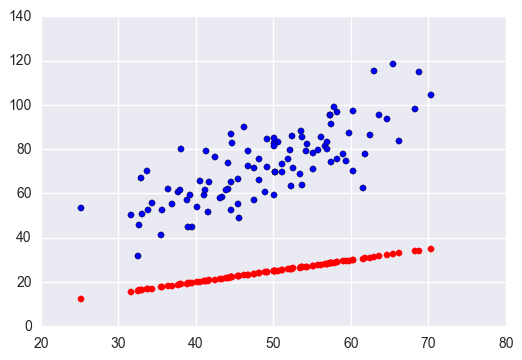

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0107738442881, m = 0.545403430981, error = 2285.08288251


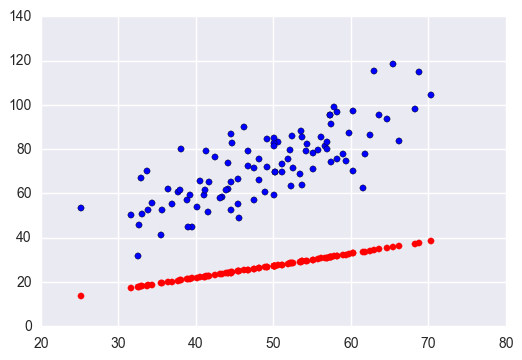

In [384]:
learning_rate = 0.00001
for num in range(0,10):
    run(num,learning_rate)
    plt.show()
